Links:
    Word2Vec - https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

In [53]:
from gensim.models.fasttext import FastText as FT_gensim
import re # regexp
import string # for punctuation regexp
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # stemming
from gensim.utils import tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, SnowballStemmer
import os
from gensim.models import Word2Vec, FastText
import pymorphy2

In [139]:
# variables
file_path = "./raw_text/"
files = os.listdir(file_path)
files = [f for f in files if ".txt" in f]
print(files)

['.war.txt.icloud', 'fel_dzer.txt', 'groza.txt', '.anna.txt.icloud']


In [108]:
documents = [open(file_path + d).read() for d in files]

In [109]:
# preprocessing of single document
def preprocess_document(document):
# 0. Create morph
#     morph = pymorphy2.MorphAnalyzer()
# 1. Remove all the special characters
    document = re.sub(r'\W', ' ', str(document))
# 2. Convert document to lowercase
    document = document.lower()
# 3. Remove punctuation
    document = document.translate(string.punctuation)
# 4. Remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
# 5. Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
# 6. Remove whitespaces
    document = document.strip()
# 7. Tokenization
    document = document.split()
# 8. Remove stop-words
    stop_words = stopwords.words('russian')
    document = [i for i in document if i not in stop_words]
# 9. Stemming and del one letter words
    stemmer = PorterStemmer()
    document = [stemmer.stem(i) for i in document if len(i) > 1]
# 11. Lemmatization
#     lemmatizer = SnowballStemmer('russian')
#     print(document[0])
#     document =  [lemmatizer.stem(i) for i in document]
    return document
    

In [110]:
# prepare corpus from documets
def preprocess_cor_documents(documents):
    corpus = []
    for document in documents:
        corpus.append(preprocess_document(document))
    return corpus

In [111]:
# Receive corpus
corpus = preprocess_cor_documents(documents)

Training Word2Vec

 Parameters:

 sentences(iterable of iterables, optional) - the sentences iterable can be simply a list of lists of tokens.
 corpus_file(str, optional) - path to a corpus file in LineSentence format.
 size(int, optional) - size of vector
 min_count(int, optional) - ignore words which appear less than min_count variable
 workers(int, optional) - count for parallel training. Need Cython installed.
 windows(int, optional) - maximum distance between the current and predicted word within a sentence.
 sg({0, 1}, optional) – training algorithm: 1 for skip-gram; otherwise CBOW.
 hs({0, 1}, optional) – If 1, hierarchical softmax will be used for model training.
     If 0, and negative is non-zero, negative sampling will be used.
 cbow_mean({0, 1}, optional) – If 0, use the sum of the context word vectors.
     If 1, use the mean, only applies when cbow is used.
 alpha(float, optional) – the initial learning rate.

In [135]:
# training cbow Word2Vec model
model_wv_cbow = Word2Vec(sentences=corpus, size=100, min_count=2, window=3, sg=0)

In [132]:
# Training skip-gram Word2Vec model
model_wv_skip_gram = Word2Vec(sentences=corpus, size=100, min_count=2, window=10, sg=1)

In [113]:
# Training FastText
model_ft = FastText(sentences=corpus, size=100, window=10, min_count=2)

In [ ]:
# save model
model_ft.save("model_ft.model")

In [ ]:
# load model
mod = FastText.load("model.model")

In [58]:
# Import for visualization
from sklearn.manifold import TSNE
import re
import matplotlib.pyplot as plt
import pandas as pd
import datetime

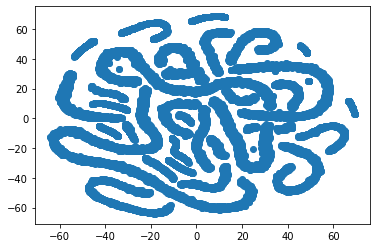

<bound method _AxesBase.set_ylim of <matplotlib.axes._subplots.AxesSubplot object at 0x1a223fdc50>>

In [137]:
# Visualization of vectors
vocab = list(model_ft.wv.vocab)
X = model_ft.wv[vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

# for word, pos in df.iterrows():
#     ax.annotate(word, pos)

plt.show()
ax.set_xlim
ax.set_ylim

In [138]:
# Save image
fig.savefig(fname="./result/model_ft_window=10_size=100_without_stemming_all_textes_%s.png" % datetime.datetime.now().strftime("%I:%M%p on %B %d, %Y"), quality=100)

In [30]:
print(corpus)

[['annot', 'пьеса', 'гроза', '1859', 'наиболее', 'значимая', 'творчестве', 'александра', 'николаевича', 'островского', 'это', 'яркая', 'история', 'отчаявшейся', 'нежной', 'души', 'история', 'любви', 'беззащитной', 'женщины', 'мире', 'несостоятельных', 'мужчин', 'трагическая', 'судьба', 'катерины', 'молодой', 'женщины', 'задыхающейся', 'тяжелой', 'обстановке', 'патриархальной', 'семьи', 'рвущейся', 'свободу', 'мечтающей', 'свете', 'воле', 'которых', 'провинциальном', 'городке', 'случайно', 'стала', 'символом', 'российской', 'жизни', 'переломе', 'двух', 'эпох', 'александр', 'николаевич', 'островский', 'действие', 'первое', 'явление', 'первое', 'явление', 'второе', 'явление', 'третье', 'явление', 'четвертое', 'явление', 'пятое', 'явление', 'шестое', 'явление', 'седьмое', 'явление', 'восьмое', 'явление', 'девятое', 'действие', 'второе', 'явление', 'первое', 'явление', 'второе', 'явление', 'третье', 'явление', 'четвертое', 'явление', 'пятое', 'явление', 'шестое', 'явление', 'седьмое', 'явле

In [134]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [136]:
model_wv_cbow.wv.most_similar('революция')

[('клевера', 0.4335956275463104),
 ('сенатора', 0.37639719247817993),
 ('винах', 0.3584270179271698),
 ('нравственного', 0.34866875410079956),
 ('пехоту', 0.34331947565078735),
 ('удивительные', 0.3340701460838318),
 ('числу', 0.3332085907459259),
 ('подвергать', 0.32942134141921997),
 ('девичьей', 0.32889091968536377),
 ('земледелие', 0.3285413980484009)]